In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df = pd.read_excel('financial_source.xlsx',sheet_name='Quarter Source')
df['year_quater'] = df['Year'].dt.year.astype(str) + ",Q" + df['Year'].dt.quarter.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Year                         18 non-null     datetime64[ns]
 1   Revenue                      18 non-null     int64         
 2   Gross Profit                 18 non-null     int64         
 3   Operating Profit             18 non-null     int64         
 4   Profit Before Tax            18 non-null     int64         
 5   Net Profit                   18 non-null     int64         
 6   Cost of Sales                18 non-null     int64         
 7   Total Assets                 18 non-null     int64         
 8   Total Liabilities            18 non-null     int64         
 9   Total ShareHolder's Equity   18 non-null     int64         
 10  Current Assets               18 non-null     int64         
 11  Current Liabilities          18 non-null     in

In [2]:
df_piv = df.pivot_table(
    index='year_quater',
    values=['Total Assets', 'Total Liabilities', "Total ShareHolder's Equity"],
    aggfunc='sum'
)
df_piv.head()

,Total Assets,Total Liabilities,Total ShareHolder's Equity
year_quater,,,
"2020,Q1",1121264,361901,759363
"2020,Q2",1223300,405978,817322
"2020,Q3",1290229,403951,886278
"2020,Q4",1415428,273104,1142324
"2021,Q1",1573268,363934,1209334


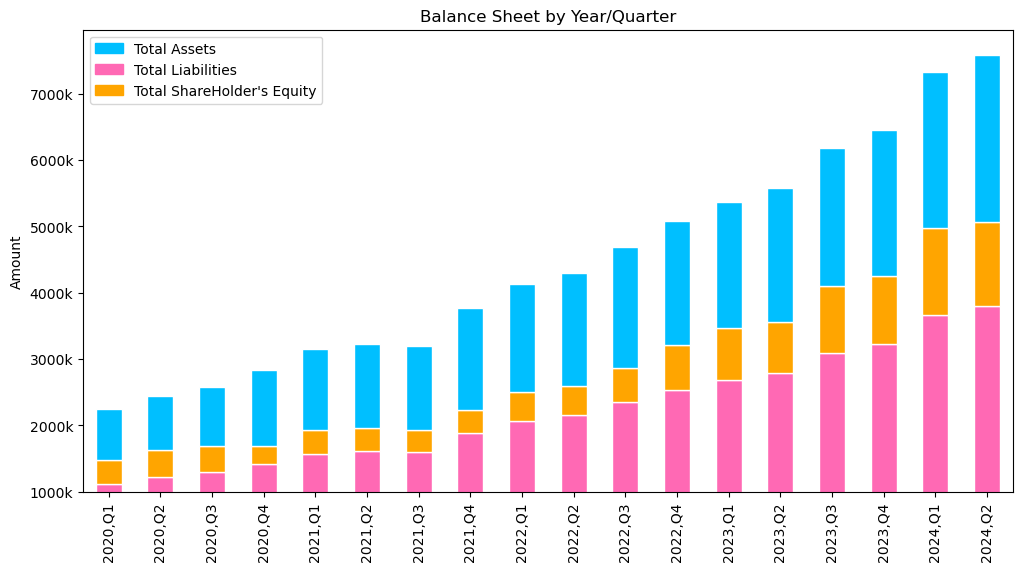

In [8]:
from matplotlib.patches import Patch

custom_colors = ['hotpink', 'orange', 'deepskyblue']

ax = df_piv.plot.bar(stacked=True,figsize=(12,6), color=custom_colors,edgecolor='white')

# Add titles and labels
plt.title('Balance Sheet by Year/Quarter')
plt.ylabel('Amount')
plt.xlabel('')

# Format the y-axis to display values in thousands (k)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k'))
plt.ylim(1000000)

cfo = Patch(label='Total Assets',color='deepskyblue')
cfi = Patch(label='Total Liabilities',color='hotpink')
cff = Patch(label="Total ShareHolder's Equity",color='orange')

plt.legend(handles=[cfo, cfi,cff])
plt.show()